# 辨識圖片裡的車牌號碼,並將車牌框起來

In [ ]:
import os
import io

import matplotlib.pyplot as plt
from PIL import Image
from google.cloud import vision

YOUR_PLATE = 'some_plate.jpg'
YOUR_SERVICE = 'key.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = YOUR_SERVICE
client = vision.ImageAnnotatorClient()

with open(YOUR_PLATE, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [ ]:
response = client.document_text_detection(image=image)

196100
Thanne
| 200米雅
房東大集合
收益3倍利
2969-8988
萬禧
北
• 接待會館到了
¥583購
32-46坪2967-5777
采輪公園
工程01-225-8-28
196100
Thanne
|
200
米雅
房東
大
集合
收益
3
倍
利
2969-8988
萬
禧
北
•
接待
會館
到
了
¥
583
購
32-46
坪
2967-5777
采
輪
公園
工程
01-225-8-28


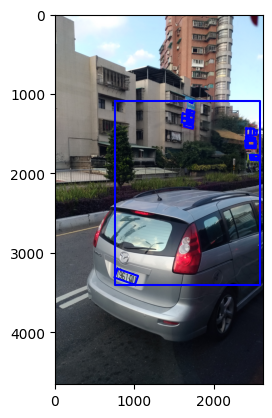

In [ ]:
im = Image.open(YOUR_PLATE)

plt.imshow(im)

for text in response.text_annotations:
    print(text.description)
    a = [(v.x, v.y) for v in text.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')

plt.show()

In [ ]:
response = client.object_localization(image=image)

## License plate

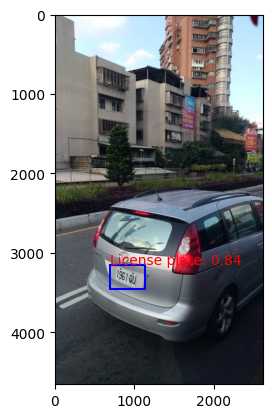

In [ ]:
plt.imshow(im)

w, h = im.size
plates = []
for obj in response.localized_object_annotations:
    if obj.name == 'License plate':
        desc = f'{obj.name}: {obj.score:.2f}'
        a = [(v.x * w, v.y * h) for v in obj.bounding_poly.normalized_vertices]
        a.append(a[0])
        x, y = zip(*a)
        plates.append({'bound': [min(x), min(y), max(x), max(y)], 'coor': [x, y]})
        plt.plot(x, y, color='blue')
        plt.text(x[0], y[0], desc, color='red')

plt.show()

In [ ]:
for plate in plates:
    p = im.crop(plates[0]['bound'])
    buf = io.BytesIO()
    p.save(buf, format='JPEG')
    pi = vision.Image(content=buf.getvalue())
    license = client.text_detection(image=pi)
    r = [text.description.strip() for text in license.text_annotations]
    plate['text'] = r
    print(r)

['No 1961', 'No', '1961']


## Car

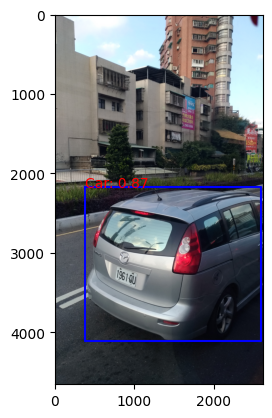

In [ ]:
plt.imshow(im)

w, h = im.size
plates = []
for obj in response.localized_object_annotations:
    if obj.name == 'Car': #'License plate':
        desc = f'{obj.name}: {obj.score:.2f}'
        a = [(v.x * w, v.y * h) for v in obj.bounding_poly.normalized_vertices]
        a.append(a[0])
        x, y = zip(*a)
        plates.append({'bound': [min(x), min(y), max(x), max(y)], 'coor': [x, y]})
        plt.plot(x, y, color='blue')
        plt.text(x[0], y[0], desc, color='red')

plt.show()

In [ ]:
for plate in plates:
    p = im.crop(plates[0]['bound'])
    buf = io.BytesIO()
    p.save(buf, format='JPEG')
    pi = vision.Image(content=buf.getvalue())
    car = client.text_detection(image=pi)
    r = [text.description.strip() for text in car.text_annotations]
    plate['text'] = r
    print(r)

['1961 QU', '1961', 'QU']


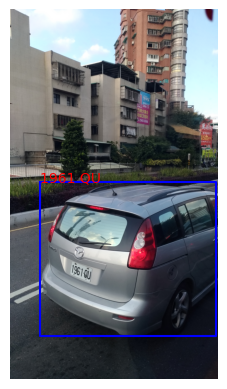

In [ ]:
plt.imshow(im)

for plate in plates:
    desc = list(plate['text'])[0]
    plt.plot(plate['coor'][0], plate['coor'][1], color='blue')
    plt.text(x[0], y[0], desc, color='red')

plt.axis('off')
plt.show()